In [6]:
%pylab inline
import sys
sys.path.append('../../MW-LMC-SCF/code') 
#from read_coefficients import load_scf_coefficients
plt.style.use('~/matplotlib.mplstyle')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
import gala.potential as gp
import k3d
import bfe
import astropy.units as u
import pyEXP

In [12]:
# Load Expansions 

def load_gc23_exp(mwlmc, n_init, n_final, host=False, sat=False,): 
    path_to_exp = "../../data/expansion/{}_1e7/".format(mwlmc)
    host_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_debris_test_host_snap_".format(mwlmc)
    sat_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_debris_test_sat_snap_".format(mwlmc)
    
    nsnaps = n_final - n_init
    
    coefficients = []
    exp_length = []
    exp_param = []
    com = []
    
    if host == True:
        host_coeff = np.zeros((nsnaps, 5, 21, 21, 21))
        host_rcom = np.zeros((nsnaps, 3))
        for i in range(n_init, n_final):
            host_coeff[i-n_init], exp_host_length, exp_host_params, host_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + host_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(host_coeff)
        exp_length.append(exp_host_length)
        exp_param.append(exp_host_params)
        com.append(host_rcom)
        
    if sat == True:
        sat_coeff = np.zeros((nsnaps, 5, 21, 21, 21))
        sat_rcom = np.zeros((nsnaps, 3))
        
        for i in range(n_init, n_final):
            sat_coeff[i-n_init], exp_sat_length, exp_sat_params, sat_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + sat_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(sat_coeff)
        exp_length.append(exp_sat_length)
        exp_param.append(exp_sat_params)
        com.append(sat_rcom)
        
    
        
    return coefficients, exp_length, exp_param, com

In [13]:
mwlmc5_coeff, mwmlc5_exp_length, mwlmc5_exp_params, mwlmc5_rcom = load_gc23_exp('MWLMC5', 0, 400, True, sat=False)

<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coeff

<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coeff

<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coeff

<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coeff

<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coeff

<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coeff

<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coeff

In [14]:
## Implement smoothening
## Smatrix = mwlmc_bfe.coefficients_smoothing.reshape_matrix(S, 20, 20, 20)
## Tmatrix = mwlmc_bfe.coefficients_smoothing.reshape_matrix(T, 20, 20, 20)

In [15]:
## Visualize fields

In [17]:
mwlmc5_host_rs = mwlmc5_exp_params[0][0]
#mwlmc5_sat_rs = mwlmc5_exp_params[1][0]

In [19]:
np.shape(mwlmc5_coeff)

(1, 400, 5, 21, 21, 21)

In [20]:
pot_scf = gp.scf.SCFInterpolatedPotential(m=1E10*u.Msun, r_s=40.85*u.kpc, tj = np.arange(0, 8, 0.02)*u.Gyr,
                          Sjnlm=mwlmc5_coeff[0][:,0,:,:,:], Tjnlm=mwlmc5_coeff[0][:,1,:,:,:], 
                          com_xj = mwlmc5_rcom[0]*u.kpc, com_vj=np.zeros((400, 3))*u.km/u.s,
                          units=[u.kpc, u.Gyr, u.Msun, u.radian])

In [25]:
def get_mwlmc_gala_potential(time, sat=True):
    mwlmc_pot = gp.CCompositePotential()
    times = np.arange(0, 8, 0.02)
    snap_idx = np.where(times == time)[0][0]
    print(snap_idx)
    
    mwlmc_pot['mw'] = gp.scf.SCFInterpolatedPotential(m=1E10*u.Msun, r_s=40.85*u.kpc, tj = times*u.Gyr,
                          Sjnlm=mwlmc5_coeff[0][:,0,:,:,:], Tjnlm=mwlmc5_coeff[0][:,1,:,:,:], 
                          com_xj = mwlmc5_rcom[0]*u.kpc, com_vj=np.zeros((400, 3))*u.km/u.s,
                          units=[u.kpc, u.Gyr, u.Msun, u.radian], origin=[0.0, 0.0, 0.0])

    if sat == True:
        mwlmc_pot['lmc'] = gp.scf.SCFInterpolatedPotential(m=1E10*u.Msun, r_s=20.4*u.kpc, tj = times*u.Gyr,
                              Sjnlm=mwlmc5_coeff[1][:,0,:,:,:], Tjnlm=mwlmc5_coeff[1][:,1,:,:,:], 
                              com_xj = mwlmc5_rcom[1]*u.kpc, com_vj=np.zeros((400, 3))*u.km/u.s,
                              units=[u.kpc, u.Gyr, u.Msun, u.radian], origin=mwlmc5_rcom[1][snap_idx])

        return mwlmc_pot, mwlmc5_rcom[1][:snap_idx+1]
    
    else: 
        return mwlmc_pot

In [26]:
mwlmc_pot_t0 = get_mwlmc_gala_potential(2.2, sat=False)

110


In [83]:
mwlmc_pot_t1 = get_mwlmc_gala_potential(1.0, sat=False)

50


In [28]:
mwlmc_pot_t2 = get_mwlmc_gala_potential(0.2, sat=False)

10


In [29]:
nbins = 50
grid = np.linspace(-400, 400, nbins)
y_grid, z_grid = np.meshgrid(grid, grid)

In [91]:
mwlmc_a_slice_t0 = mwlmc_pot_t0.energy([np.zeros_like(y_grid.flatten()), y_grid.flatten(), z_grid.flatten()], t=0.2)


In [92]:
mwlmc_a_slice_t1 = mwlmc_pot_t1.energy([np.zeros_like(y_grid.flatten()), y_grid.flatten(), z_grid.flatten()], t=1.2)


In [90]:
mwlmc_a_slice_t2 = mwlmc_pot_t2.energy([np.zeros_like(y_grid.flatten()), y_grid.flatten(), z_grid.flatten()], t=2.2)


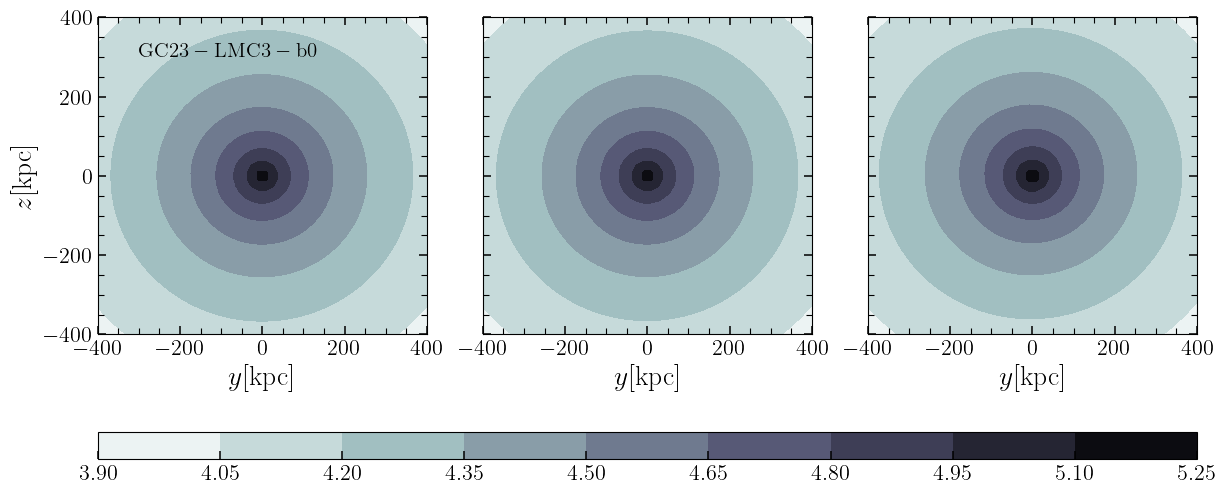

In [94]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5.5), sharey=True)
ax[0].contourf(y_grid, z_grid, np.log10((-mwlmc_a_slice_t0).reshape(nbins, nbins).value),
               10, cmap='bone_r',origin='lower')
ax[1].contourf(y_grid, z_grid, np.log10((-mwlmc_a_slice_t1).reshape(nbins, nbins).value), 
               10, cmap='bone_r', origin='lower')
im = ax[2].contourf(y_grid, z_grid, np.log10((-mwlmc_a_slice_t2).reshape(nbins, nbins).value),
                    10, cmap='bone_r', origin='lower')

#ax[2].plot(orbit_t0[:,1], orbit_t0[:,2], c='k')
#ax[1].plot(orbit_t1[:,1], orbit_t1[:,2], c='k')
#ax[0].plot(orbit_t2[:,1], orbit_t2[:,2], c='k')

#ax[0][1].contourf(y_grid, z_grid, np.log10(np.abs(sat_slice.reshape(300, 300).value)), 20, cmap='cividis', origin='lower')
#ax[1][1].contourf(y_grid, z_grid, np.log10(np.abs(sat_slice_t.reshape(300, 300).value)), 20, cmap='cividis', origin='lower')

#ax[1][2].contourf(y_grid, z_grid, np.log10(np.abs(mwlmc_slice_t.reshape(300, 300).value)).T, 20, cmap='cividis')

plt.tight_layout()

ax[0].set_ylabel(r'$z\rm{[kpc]}$')
ax[0].set_xlabel(r'$y\rm{[kpc]}$')
ax[1].set_xlabel(r'$y\rm{[kpc]}$')
ax[2].set_xlabel(r'$y\rm{[kpc]}$')

ax[0].text(-300, 300, r'$\rm{GC23-LMC3-b0}$', fontsize=15, c='k')

fig.colorbar(im, ax=ax[:], orientation='horizontal', aspect=40, pad=0.2)
#plt.tight_layout(

#plt.savefig('../../figures/ngc23_ac_fields.pdf', bbox_inches='tight')

In [36]:
## pyexp

In [54]:
mwcoefs = pyEXP.coefs.Coefs.factory('../../notebook/MWLMC5_halov12.h5')

In [57]:
sys.path.append('../mssa/')

In [61]:
!cp ../mssa/SLGrid.empirical.halo.isolate.mwlmc5v12 .

In [62]:
!cp ../mssa/.slgrid_sph_cache_halo_mwlmc5v12.h5 .

In [63]:
# Define config params
mwconfig = """
id: sphereSL
parameters:
  numr: 500
  rmin: 0.01
  rmax: 600
  Lmax: 4
  nmax: 15
  scale: 40.85
  modelname: SLGrid.empirical.halo.isolate.mwlmc5v12
  cachename: .slgrid_sph_cache_halo_mwlmc5v12
"""

In [64]:
mwbasis = pyEXP.basis.Basis.factory(mwconfig)

---- SLGridSph::ReadH5Cache: read basis cache <.slgrid_sph_cache_halo_mwlmc5v12.h5>


In [65]:
mw_basis_grid = mwbasis.getBasis(-3, 2.5, 200)

In [74]:
# Dedine grid parameters: 
pmin  = [0.0, -400.0, -400.0]
pmax  = [0.0,  400.0, 400.0]
grid  = [  0,   50,   50]

In [82]:
# Generate fields
fields_t0 = pyEXP.field.FieldGenerator(times=[0.2], lower=pmin, upper=pmax, gridsize=grid)
surfaces_t0 = fields_t0.slices(mwbasis, mwcoefs)

fields_t1 = pyEXP.field.FieldGenerator(times=[1.0], lower=pmin, upper=pmax, gridsize=grid)
surfaces_t1 = fields_t1.slices(mwbasis, mwcoefs)

fields_t2 = pyEXP.field.FieldGenerator(times=[2.2], lower=pmin, upper=pmax, gridsize=grid)
surfaces_t2 = fields_t2.slices(mwbasis, mwcoefs)

In [ ]:
surfaces_t0

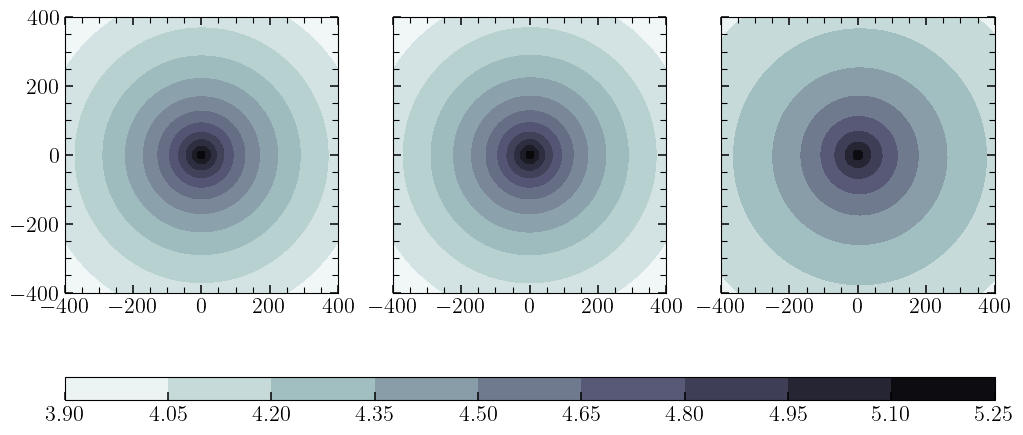

In [137]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5.5), sharey=True)
ax[0].contourf(y_grid, z_grid, 
                  np.log10(-surfaces_t0[0.2]['p']*mwlmc_pot_t2.G*M0.value),10, 
                  extent=[-400, 400, -400, 400], cmap='bone_r')

ax[1].contourf(y_grid, z_grid, 
                  np.log10(-surfaces_t1[1.0]['p']*mwlmc_pot_t2.G*M0.value),10, 
                  extent=[-400, 400, -400, 400], cmap='bone_r')

im = ax[2].contourf(y_grid, z_grid, 
                  np.log10(-surfaces_t2[2.2]['p']*mwlmc_pot_t2.G*M0.value),10, 
                  extent=[-400, 400, -400, 400], cmap='bone_r')

fig.colorbar(im, ax=ax[:], orientation='horizontal', aspect=40, pad=0.2)


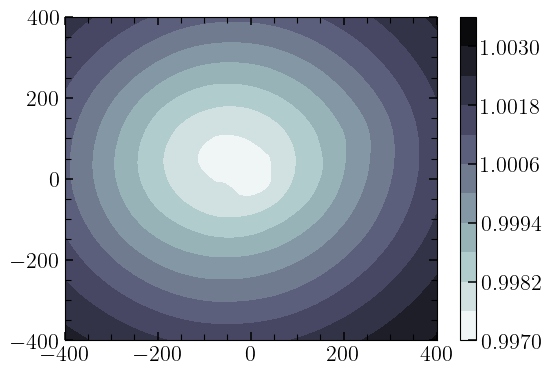

In [140]:
plt.contourf(y_grid, z_grid, 
          np.log10(-surfaces_t0[0.2]['p']*mwlmc_pot_t2.G*M0.value)/np.log10((-mwlmc_a_slice_t0).reshape(nbins, nbins).value),10, 
          extent=[-400, 400, -400, 400], cmap='bone_r')
plt.colorbar()

In [125]:
#mwcoefs.set_coefs(mwcoefs.getCoefStruct(0.0))
dens_exp = np.zeros(100)
dens_mon_exp = np.zeros(100)

for j in range(100):
    dens_mon_exp[j] = mwbasis.getFields(xyz[0][j], 0, 0)[0]
    dens_exp[j] = mwbasis.getFields(xyz[0][j], 0, 0)[2]

In [89]:
mwlmc_pot_t2.G

4.498502151469553e-06

In [101]:
# Density profiles

In [106]:
xyz = np.zeros((3, 100))
xyz[0] = np.linspace(0.01, 300, 100)

In [107]:
rho_gala = mwlmc_pot_t0.density(xyz)

In [132]:
mwlmc_pot_t0.mass_enclosed([600, 0, 0])

<Quantity [1.29773745e+12] solMass>

In [133]:
# M0 at R0. In this case R0=600. This is in the SLGrid.empirical.halo.isolate.mwlmc5v12
M0 = mwlmc_pot_t0.mass_enclosed([600, 0, 0])

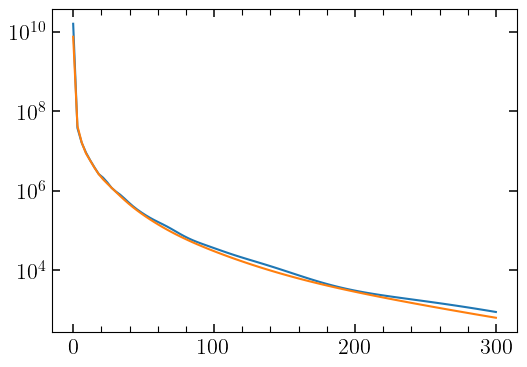

In [134]:
plt.semilogy(xyz[0], rho_gala)
plt.semilogy(xyz[0], (dens_exp+dens_mon_exp)*M0)

#plt.semilogy(xyz[0], dens_mon_exp*1e12)
